# Clustering

### Imports

In [9]:
# std
import matplotlib.pyplot as plt

# 3rd
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.vq import kmeans2, whiten

### Load data

In [10]:
df = pd.read_csv('data/apartments-geo.csv')
coordinates = df[['lng', 'lat']].loc[~(df['lat'].isna()) & ~(df['lng'].isna())].drop_duplicates().as_matrix()
coordinates

array([[-118.3027   ,   34.0606   ],
       [-122.3276   ,   37.5507   ],
       [-121.9712   ,   37.5308   ],
       [-118.3022   ,   34.0665   ],
       [-122.0006   ,   37.3983   ],
       [-117.7308   ,   33.9797   ],
       [-121.9406   ,   37.4087   ],
       [-118.2385   ,   34.0614   ],
       [-117.8224   ,   33.6951   ],
       [-117.8298   ,   33.6829   ],
       [-121.8957   ,   37.6873   ],
       [-118.3941   ,   33.9631   ],
       [-118.4525   ,   33.9779   ],
       [-118.6159   ,   34.1767   ],
       [-122.3892   ,   37.7864   ],
       [-122.3971   ,   37.7621   ],
       [-117.1593   ,   32.7185   ],
       [-117.8264   ,   33.6607   ],
       [-122.4147   ,   37.7725   ],
       [-118.2716   ,   34.0434   ],
       [-118.0033   ,   33.721    ],
       [-122.3867   ,   37.7694   ],
       [-118.0051   ,   33.6773   ],
       [-118.372    ,   34.0737   ],
       [-122.088    ,   37.3855   ],
       [-117.9085   ,   33.6801   ],
       [-117.9321   ,   33.621    ],
 

### K means clustering

/usr/local/lib/python3.6/site-packages/scipy/cluster/vq.py:523: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


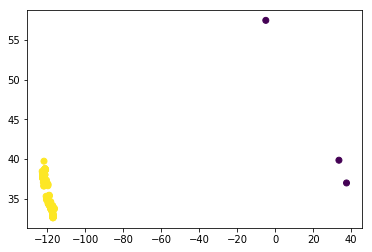

In [11]:
x, y = kmeans2(whiten(coordinates), 3, iter=1000)  
plt.scatter(coordinates[:,0], coordinates[:,1], c=y);
plt.show()

### Remove isolated points

In [12]:
avg = coordinates.mean(axis=0)
cleaned_coordinates = []
for x in coordinates:
    if abs(x[0] - avg[0]) / abs(avg[0]) <= 0.5 and abs(x[1] - avg[1]) / abs(avg[1]) <= 0.5:
        cleaned_coordinates.append(x)
        
cleaned_coordinates = np.array(cleaned_coordinates)
cleaned_coordinates

array([[-118.3027,   34.0606],
       [-122.3276,   37.5507],
       [-121.9712,   37.5308],
       [-118.3022,   34.0665],
       [-122.0006,   37.3983],
       [-117.7308,   33.9797],
       [-121.9406,   37.4087],
       [-118.2385,   34.0614],
       [-117.8224,   33.6951],
       [-117.8298,   33.6829],
       [-121.8957,   37.6873],
       [-118.3941,   33.9631],
       [-118.4525,   33.9779],
       [-118.6159,   34.1767],
       [-122.3892,   37.7864],
       [-122.3971,   37.7621],
       [-117.1593,   32.7185],
       [-117.8264,   33.6607],
       [-122.4147,   37.7725],
       [-118.2716,   34.0434],
       [-118.0033,   33.721 ],
       [-122.3867,   37.7694],
       [-118.0051,   33.6773],
       [-118.372 ,   34.0737],
       [-122.088 ,   37.3855],
       [-117.9085,   33.6801],
       [-117.9321,   33.621 ],
       [-117.9086,   33.8359],
       [-122.067 ,   37.6374],
       [-117.9063,   33.8994],
       [-117.1965,   32.8239],
       [-117.1392,   32.7973],
       [

### Kmeans n°2

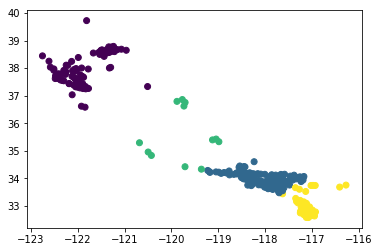

In [13]:
x, y = kmeans2(cleaned_coordinates, 4, iter=100)  
plt.scatter(cleaned_coordinates[:,0], cleaned_coordinates[:,1], c=y);
plt.show()

### Draw heatmap

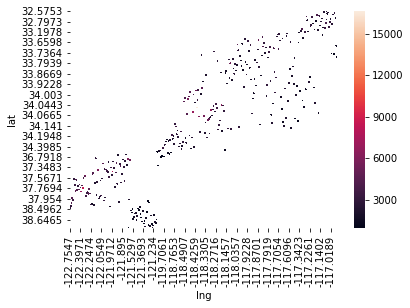

In [14]:
heatmap_df = df[['lng', 'lat', 'rent']].loc[
    (df['rent'] > 0) & 
    ~(df['rent'].isna()) & 
    ~(df['rent'].isnull()) &
    ~(df['lat'].isna()) & 
    ~(df['lng'].isna()) &
    (abs(df['lng'] - avg[0]) / abs(avg[0]) <= 0.5) &
    (abs(df['lat'] - avg[1]) / abs(avg[1]) <= 0.5)
].groupby(['lng', 'lat']).agg('mean').reset_index()

pivoted_heatmap_df = heatmap_df.pivot(index='lat', columns='lng', values='rent')
mask = pivoted_heatmap_df.isnull()
sns.heatmap(pivoted_heatmap_df, mask=mask)